In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

df = pd.read_csv('heart.csv')

X = df.drop(columns=["target"])
y = df["target"]

In [2]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [3]:
regularizations = {
    "L1" : LogisticRegression(penalty='l1',solver='saga',max_iter=1000),
    "L2" : LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000),
    "ElasticNet" : LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5,max_iter=1000),
}

In [4]:
for name, model in regularizations.items():
    print(f"\n=== {name} Regularization ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix")
    print(confusion_matrix(y_pred,y_test))


=== L1 Regularization ===
Accuracy: 0.8525
Confusion Matrix
[[24  4]
 [ 5 28]]

=== L2 Regularization ===
Accuracy: 0.8852
Confusion Matrix
[[25  3]
 [ 4 29]]

=== ElasticNet Regularization ===
Accuracy: 0.8525
Confusion Matrix
[[24  4]
 [ 5 28]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Student dataset polynomial regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('linear2.csv')
X = df[['Hours_Studied']].values
y = df['Score'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [6]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly,y_train)
y_pred = model.predict(X_test_poly)

In [7]:
rmse = mean_squared_error(y_test,y_pred,squared=False)
r2 = r2_score(y_test,y_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


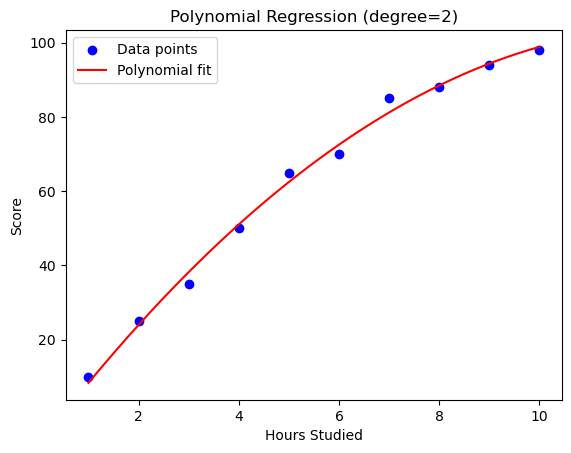

In [8]:
plt.scatter(X, y, color='blue', label='Data points')
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)
plt.plot(X_plot, y_plot, color='red', label='Polynomial fit')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.title('Polynomial Regression (degree=2)')
plt.legend()
plt.show()

Multiple Linear Regression

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")


RMSE: 0.746
R^2 Score: 0.576


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


kNN 

K=1, Accuracy=1.000
K=2, Accuracy=1.000
K=3, Accuracy=1.000
K=4, Accuracy=1.000
K=5, Accuracy=1.000
K=6, Accuracy=1.000
K=7, Accuracy=0.967
K=8, Accuracy=1.000
K=9, Accuracy=1.000
K=10, Accuracy=1.000
K=11, Accuracy=1.000
K=12, Accuracy=1.000
K=13, Accuracy=1.000
K=14, Accuracy=1.000
K=15, Accuracy=1.000


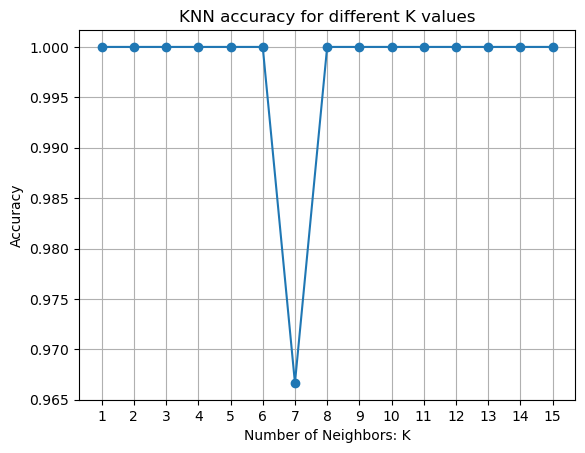

In [10]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_values = range(1, 16)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.3f}")

plt.plot(k_values, accuracies, marker='o')
plt.title("KNN accuracy for different K values")
plt.xlabel("Number of Neighbors: K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()
